In [1]:
import yfinance as yf

# Extract Tesla stock data
tesla_data = yf.Ticker("TSLA").history(period="max")

# Reset index to have a clean DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [7]:
pip install selenium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import pandas as pd

# Setup the WebDriver (ensure you have the necessary driver installed)
driver = webdriver.Chrome()  # You might need to install ChromeDriver
driver.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue')

# Wait for the page to load completely
time.sleep(5)  # Adjust based on your internet speed and page load time

# Grab the page source after it has loaded
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Extract data just like we did with requests
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Extract tables and parse revenue data
for table in soup.find_all('table'):
    rows = table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            if revenue != '':
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

# Convert revenue to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Show the results
print(tesla_revenue.tail())
driver.quit()


          Date  Revenue
71  2010-09-30       31
72  2010-06-30       28
73  2010-03-31       21
74  2009-09-30       46
75  2009-06-30       27


In [16]:
import yfinance as yf

# Extract GameStop stock data
gme_data = yf.Ticker("GME").history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674833   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send HTTP request and parse page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the table containing GameStop revenue data
revenue_table = soup.find("table", attrs={"class": "historical_data_table"})

# Parse the revenue table if found
data = []
if revenue_table:
    for row in revenue_table.find_all("tr"):
        columns = row.find_all("td")
        if len(columns) > 1:
            data.append([col.text.strip() for col in columns])

# Create a DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Clean the DataFrame
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({r'\$|,': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display the last five rows
print(gme_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [19]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

# Set up Selenium WebDriver
driver = webdriver.Chrome()  # Ensure ChromeDriver is installed
driver.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")

# Extract HTML content after the page loads
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Initialize DataFrame for storing GameStop revenue data
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find the table and extract data
for table in soup.find_all('table'):
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skipping the header row
            cols = row.find_all('td')  # Find all the data cells
            if len(cols) == 2:  # Ensure the row has exactly 2 columns (Date and Revenue)
                date = cols[0].text.strip()  # Extract date
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean revenue
                if revenue != '':
                    gme_revenue = pd.concat(
                        [gme_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})]
                    )

# Convert 'Revenue' column to numeric
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Display the result
print(gme_revenue.tail())

# Close the browser after the task is done
driver.quit()


         Date  Revenue
0  2010-01-31   3524.0
0  2009-10-31   1835.0
0  2009-07-31   1739.0
0  2009-04-30   1981.0
0  2009-01-31   3492.0


In [21]:
import matplotlib.pyplot as plt

In [22]:
def plot_stock_data(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price in USD')
    plt.legend()
    plt.show()

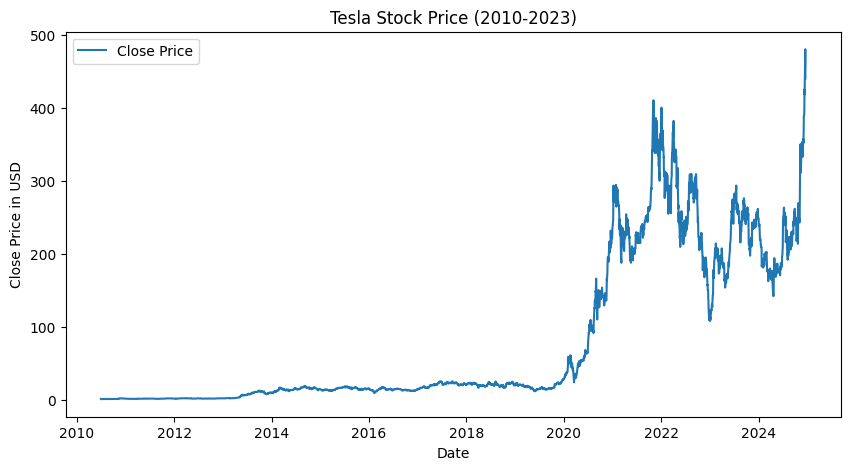

In [23]:
plot_stock_data(tesla_data, "Tesla Stock Price (2010-2023)")

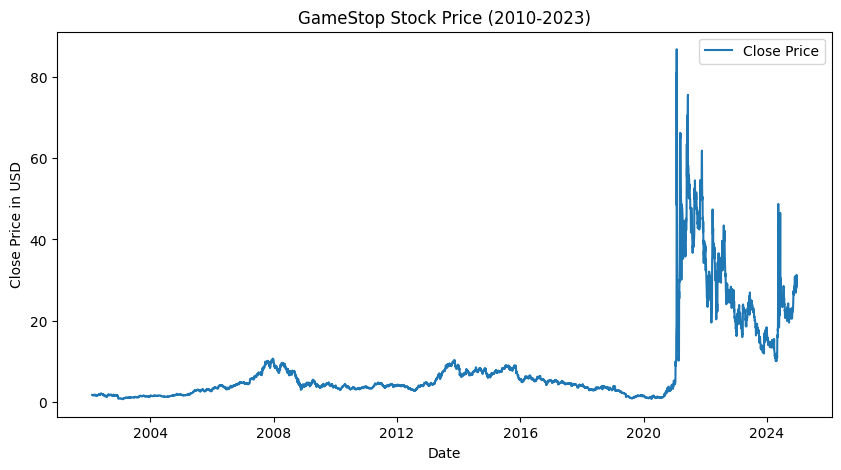

In [24]:
plot_stock_data(gme_data, "GameStop Stock Price (2010-2023)")